In [1]:
suppressPackageStartupMessages(library(plyr))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
library(ggplot2)
library(ggpubr)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    mutate




In [2]:
meta_data<-read.csv('03_TEAseq_PenSenior/meta_data_GEO.csv')
meta_data<-meta_data[c('combined_sample_id','subject_id.ch1')]
colnames(meta_data)[1]<-'Sample'

df<-read.csv('03_TEAseq_PenSenior/Motif_Mean_Score.csv')

In [3]:
df<-df %>% filter(AIFI_L3=='CM CD4 T cell') 
df_filtered<-df[grepl('Sample|GATA3|TBX21',colnames(df))]

In [4]:
df_filtered <- df_filtered %>%
  left_join(meta_data) %>%
  mutate('Age Group' = case_when(
    startsWith(subject_id.ch1, "BR2") ~ "Older",
    TRUE ~ 'Childern' 
  ))

Joining with `by = join_by(Sample)`


In [5]:
df_filtered <- df_filtered %>%
  tidyr::pivot_longer(
    cols = starts_with("motif"),
    names_to = "Variable",
    values_to = "Value"
  )

In [6]:
df_filtered$Variable<-gsub("motif_","",df_filtered$Variable)

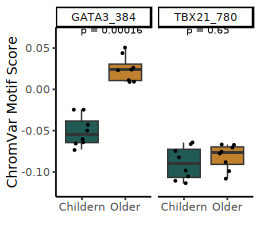

In [7]:
options(repr.plot.width = 55/25.4, repr.plot.height = 50/25.4)

p<-ggplot(df_filtered, aes(x=`Age Group`, y=Value, fill=`Age Group`)) +
    geom_boxplot(outlier.shape = NA,lwd=0.3) +
geom_point(position = position_jitter(width = 0.2),color="black", size=0.8,stroke=0) +
theme_classic(base_size=8)+  
stat_compare_means(aes(label = paste0("p = ", after_stat(p.format))),
    size=2,
    label.x=1.25,  
    vjust = -2)+
    scale_fill_manual(values = c("Older" = '#bf812d', "Childern" = '#205B56'))+
    scale_y_continuous(limits = c(NA, NA), 
                       expand = expansion(mult = c(0.1, 0.15)))+
theme(legend.position="none")+
xlab('')+
ylab('ChromVar Motif Score')+facet_wrap(~Variable)
p
ggsave('FigureL.pdf',p,width = 50/25.4,height = 50/25.4)